In [3]:
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.callbacks import ModelCheckpoint
from keras.utils import np_utils
from sklearn.metrics import roc_auc_score, roc_curve, auc
from keras.optimizers import SGD, Adamax, Adagrad, Nadam
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import class_weight
# from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

# input seed number
seed = 0
np.random.seed(seed)
tf.set_random_seed(seed)

# input data
df = pd.read_csv('dataset/oversampled_training_validation_set_7.csv',
                 names = ["t-tau","p-tau","p/t-ratio","A-beta","a-syn","14-3-3","patients"])

'''
# make graph
sns.pairplot(df, hue='patients', markers=["o", "x"], size=5);
plt.savefig('./dataset/images/Fig.1_1.png', dpi=300)
plt.show()


plt.figure(figsize=(12, 12))
sns.heatmap(df.corr(), linewidths=0.1, vmax=0.5, cmap=plt.cm.gist_heat, linecolor='white', annot=True)
plt.savefig('./dataset/images/Fig.2_1.png', dpi=300)
plt.show()
'''


# one-hot encoding
dataset = df.values
X = dataset[:,0:6].astype(float)
Y_obj = dataset[:,6]

e = LabelEncoder()
e.fit(Y_obj)
Y = e.transform(Y_obj)
Y_encoded = np_utils.to_categorical(Y)


accuracy = []

# split training and validation set
X_train, X_val, Y_train, Y_val = train_test_split(X, Y_encoded, test_size=0.15,
                                                    random_state=seed)

class_weights = class_weight.compute_class_weight('balanced', np.unique(Y), Y)

init_option="random_normal"


# make model
model = Sequential() 
model.add(Dense(20, input_dim=6, kernel_initializer=init_option, activation='relu')) 
model.add(Dropout(0.1))
model.add(Dense(40, kernel_initializer=init_option, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(30, kernel_initializer=init_option, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(20, kernel_initializer=init_option, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(12, kernel_initializer=init_option, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(2, kernel_initializer=init_option, activation='softmax'))

#adagrad = Adagrad(lr=0.1, epsilon=1e-08, decay=0.0)
model.compile(loss='binary_crossentropy', optimizer='nadam', metrics=['accuracy'])
# model.compile(loss='binary_crossentropy', optimizer='Adagrad', metrics=['accuracy'])


hist = model.fit(X_train, Y_train, epochs=1600, batch_size=250,
                      validation_data=(X_val, Y_val), class_weight="class_weights")

# calculate accuracies and AUC score
print("\n loss: %.4f" % (model.evaluate(X_train, Y_train)[0]))
print("\n Accuracy: %.4f" % (model.evaluate(X_train, Y_train)[1]))

print("\n val loss: %.4f" % (model.evaluate(X_val, Y_val)[0]))
print("\n val accuracy: %.4f" % (model.evaluate(X_val, Y_val)[1]))

AUC_score = roc_auc_score(Y_val, model.predict(X_val))
print("Total roc auc score = {0:0.4f}".format(AUC_score))


'''
#save model to JSON file format
model_json = model.to_json()
with open("model_completed_set5_2X.json", "w") as json_file : 
    json_file.write(model_json)

# save weight as h5 file format
model.save_weights("model_completed_set5_2X.h5")
print("Saved model to disk")
'''

print("complete")


c:\users\sol\anaconda3\envs\tensorflow\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


Train on 340 samples, validate on 61 samples
Epoch 1/1600
340/340 [==============================] - 1s 2ms/step - loss: 0.6914 - acc: 0.4882 - val_loss: 0.6999 - val_acc: 0.4918
Epoch 2/1600
340/340 [==============================] - 0s 38us/step - loss: 0.6876 - acc: 0.6176 - val_loss: 0.7005 - val_acc: 0.5246
Epoch 3/1600
340/340 [==============================] - 0s 38us/step - loss: 0.6840 - acc: 0.6382 - val_loss: 0.7162 - val_acc: 0.4426
Epoch 4/1600
340/340 [==============================] - 0s 41us/step - loss: 0.6767 - acc: 0.5735 - val_loss: 0.7158 - val_acc: 0.5082
Epoch 5/1600
340/340 [==============================] - 0s 44us/step - loss: 0.6776 - acc: 0.6412 - val_loss: 0.7250 - val_acc: 0.5246
Epoch 6/1600
340/340 [==============================] - 0s 41us/step - loss: 0.6708 - acc: 0.6118 - val_loss: 0.7272 - val_acc: 0.5574
Epoch 7/1600
340/340 [==============================] - 0s 38us/step - loss: 0.6740 - acc: 0.6559 - val_loss: 0.6992 - val_acc: 0.6885
Epoch 8/160

340/340 [==============================] - 0s 41us/step - loss: 0.5175 - acc: 0.7118 - val_loss: 0.4803 - val_acc: 0.7541
Epoch 61/1600
340/340 [==============================] - 0s 38us/step - loss: 0.5231 - acc: 0.6971 - val_loss: 0.4897 - val_acc: 0.7377
Epoch 62/1600
340/340 [==============================] - 0s 38us/step - loss: 0.5188 - acc: 0.7059 - val_loss: 0.4788 - val_acc: 0.7213
Epoch 63/1600
340/340 [==============================] - 0s 47us/step - loss: 0.5385 - acc: 0.6941 - val_loss: 0.4604 - val_acc: 0.7705
Epoch 64/1600
340/340 [==============================] - 0s 47us/step - loss: 0.5326 - acc: 0.7324 - val_loss: 0.4682 - val_acc: 0.7213
Epoch 65/1600
340/340 [==============================] - 0s 41us/step - loss: 0.5190 - acc: 0.7088 - val_loss: 0.4571 - val_acc: 0.7213
Epoch 66/1600
340/340 [==============================] - 0s 41us/step - loss: 0.5230 - acc: 0.6941 - val_loss: 0.4587 - val_acc: 0.7377
Epoch 67/1600
340/340 [==============================] - 0s 47

Epoch 120/1600
340/340 [==============================] - 0s 44us/step - loss: 0.5250 - acc: 0.6941 - val_loss: 0.4733 - val_acc: 0.7049
Epoch 121/1600
340/340 [==============================] - 0s 44us/step - loss: 0.5027 - acc: 0.7000 - val_loss: 0.4567 - val_acc: 0.7541
Epoch 122/1600
340/340 [==============================] - 0s 50us/step - loss: 0.5074 - acc: 0.7147 - val_loss: 0.4786 - val_acc: 0.7049
Epoch 123/1600
340/340 [==============================] - 0s 35us/step - loss: 0.5125 - acc: 0.7235 - val_loss: 0.4625 - val_acc: 0.7213
Epoch 124/1600
340/340 [==============================] - 0s 41us/step - loss: 0.4931 - acc: 0.7059 - val_loss: 0.4521 - val_acc: 0.7705
Epoch 125/1600
340/340 [==============================] - 0s 47us/step - loss: 0.4927 - acc: 0.7206 - val_loss: 0.4517 - val_acc: 0.7705
Epoch 126/1600
340/340 [==============================] - 0s 41us/step - loss: 0.5025 - acc: 0.7265 - val_loss: 0.4613 - val_acc: 0.7541
Epoch 127/1600
340/340 [=================

340/340 [==============================] - 0s 41us/step - loss: 0.4867 - acc: 0.7441 - val_loss: 0.5131 - val_acc: 0.7869
Epoch 180/1600
340/340 [==============================] - ETA: 0s - loss: 0.4986 - acc: 0.744 - 0s 41us/step - loss: 0.4982 - acc: 0.7324 - val_loss: 0.4378 - val_acc: 0.7869
Epoch 181/1600
340/340 [==============================] - 0s 44us/step - loss: 0.4897 - acc: 0.7471 - val_loss: 0.4321 - val_acc: 0.7705
Epoch 182/1600
340/340 [==============================] - 0s 44us/step - loss: 0.4793 - acc: 0.7529 - val_loss: 0.4398 - val_acc: 0.7869
Epoch 183/1600
340/340 [==============================] - 0s 41us/step - loss: 0.4896 - acc: 0.7559 - val_loss: 0.4466 - val_acc: 0.7705
Epoch 184/1600
340/340 [==============================] - 0s 38us/step - loss: 0.4743 - acc: 0.7382 - val_loss: 0.4866 - val_acc: 0.7869
Epoch 185/1600
340/340 [==============================] - 0s 41us/step - loss: 0.4934 - acc: 0.7471 - val_loss: 0.4740 - val_acc: 0.7869
Epoch 186/1600
340

340/340 [==============================] - 0s 44us/step - loss: 0.4610 - acc: 0.7794 - val_loss: 0.5168 - val_acc: 0.8361
Epoch 239/1600
340/340 [==============================] - 0s 44us/step - loss: 0.4558 - acc: 0.7824 - val_loss: 0.5007 - val_acc: 0.8361
Epoch 240/1600
340/340 [==============================] - 0s 50us/step - loss: 0.4563 - acc: 0.7765 - val_loss: 0.5182 - val_acc: 0.8361
Epoch 241/1600
340/340 [==============================] - 0s 47us/step - loss: 0.4428 - acc: 0.7971 - val_loss: 0.5840 - val_acc: 0.8197
Epoch 242/1600
340/340 [==============================] - 0s 44us/step - loss: 0.4663 - acc: 0.7912 - val_loss: 0.5087 - val_acc: 0.8361
Epoch 243/1600
340/340 [==============================] - 0s 41us/step - loss: 0.4496 - acc: 0.7941 - val_loss: 0.5606 - val_acc: 0.8361
Epoch 244/1600
340/340 [==============================] - 0s 41us/step - loss: 0.4944 - acc: 0.7882 - val_loss: 0.4031 - val_acc: 0.8361
Epoch 245/1600
340/340 [==============================] 

Epoch 298/1600
340/340 [==============================] - 0s 44us/step - loss: 0.3941 - acc: 0.8265 - val_loss: 0.4851 - val_acc: 0.8525
Epoch 299/1600
340/340 [==============================] - 0s 47us/step - loss: 0.4222 - acc: 0.7882 - val_loss: 0.4695 - val_acc: 0.8525
Epoch 300/1600
340/340 [==============================] - 0s 44us/step - loss: 0.4114 - acc: 0.8118 - val_loss: 0.3991 - val_acc: 0.8852
Epoch 301/1600
340/340 [==============================] - 0s 41us/step - loss: 0.4337 - acc: 0.7735 - val_loss: 0.4566 - val_acc: 0.9016
Epoch 302/1600
340/340 [==============================] - 0s 44us/step - loss: 0.4351 - acc: 0.7971 - val_loss: 0.4824 - val_acc: 0.8361
Epoch 303/1600
340/340 [==============================] - 0s 56us/step - loss: 0.4365 - acc: 0.7824 - val_loss: 0.4855 - val_acc: 0.8689
Epoch 304/1600
340/340 [==============================] - 0s 41us/step - loss: 0.4104 - acc: 0.8118 - val_loss: 0.4443 - val_acc: 0.9016
Epoch 305/1600
340/340 [=================

Epoch 358/1600
340/340 [==============================] - 0s 41us/step - loss: 0.3715 - acc: 0.8265 - val_loss: 0.5583 - val_acc: 0.8361
Epoch 359/1600
340/340 [==============================] - 0s 44us/step - loss: 0.3534 - acc: 0.8500 - val_loss: 0.5718 - val_acc: 0.8689
Epoch 360/1600
340/340 [==============================] - 0s 44us/step - loss: 0.4044 - acc: 0.8147 - val_loss: 0.5763 - val_acc: 0.8852
Epoch 361/1600
340/340 [==============================] - 0s 44us/step - loss: 0.3641 - acc: 0.8353 - val_loss: 0.5577 - val_acc: 0.8852
Epoch 362/1600
340/340 [==============================] - 0s 38us/step - loss: 0.3665 - acc: 0.8294 - val_loss: 0.4271 - val_acc: 0.9016
Epoch 363/1600
340/340 [==============================] - 0s 41us/step - loss: 0.3844 - acc: 0.8382 - val_loss: 0.5542 - val_acc: 0.8852
Epoch 364/1600
340/340 [==============================] - 0s 41us/step - loss: 0.4078 - acc: 0.8147 - val_loss: 0.4247 - val_acc: 0.8033
Epoch 365/1600
340/340 [=================

Epoch 418/1600
340/340 [==============================] - 0s 44us/step - loss: 0.2994 - acc: 0.8735 - val_loss: 0.6249 - val_acc: 0.8197
Epoch 419/1600
340/340 [==============================] - 0s 41us/step - loss: 0.3835 - acc: 0.8206 - val_loss: 0.3594 - val_acc: 0.8689
Epoch 420/1600
340/340 [==============================] - 0s 47us/step - loss: 0.3585 - acc: 0.8353 - val_loss: 0.3219 - val_acc: 0.9016
Epoch 421/1600
340/340 [==============================] - 0s 44us/step - loss: 0.4115 - acc: 0.8118 - val_loss: 0.5337 - val_acc: 0.8033
Epoch 422/1600
340/340 [==============================] - 0s 35us/step - loss: 0.3457 - acc: 0.8559 - val_loss: 0.5200 - val_acc: 0.8525
Epoch 423/1600
340/340 [==============================] - 0s 38us/step - loss: 0.3296 - acc: 0.8500 - val_loss: 0.5344 - val_acc: 0.8361
Epoch 424/1600
340/340 [==============================] - 0s 41us/step - loss: 0.3449 - acc: 0.8353 - val_loss: 0.5059 - val_acc: 0.8852
Epoch 425/1600
340/340 [=================

340/340 [==============================] - 0s 47us/step - loss: 0.3435 - acc: 0.8647 - val_loss: 0.5032 - val_acc: 0.8525
Epoch 478/1600
340/340 [==============================] - 0s 41us/step - loss: 0.3443 - acc: 0.8353 - val_loss: 0.4881 - val_acc: 0.8525
Epoch 479/1600
340/340 [==============================] - 0s 38us/step - loss: 0.3855 - acc: 0.8500 - val_loss: 0.4796 - val_acc: 0.8689
Epoch 480/1600
340/340 [==============================] - 0s 41us/step - loss: 0.3313 - acc: 0.8471 - val_loss: 0.5326 - val_acc: 0.8361
Epoch 481/1600
340/340 [==============================] - 0s 41us/step - loss: 0.3153 - acc: 0.8647 - val_loss: 0.5076 - val_acc: 0.8525
Epoch 482/1600
340/340 [==============================] - 0s 44us/step - loss: 0.3184 - acc: 0.8353 - val_loss: 0.6060 - val_acc: 0.8361
Epoch 483/1600
340/340 [==============================] - 0s 41us/step - loss: 0.3759 - acc: 0.8353 - val_loss: 0.5268 - val_acc: 0.8361
Epoch 484/1600
340/340 [==============================] 

340/340 [==============================] - 0s 47us/step - loss: 0.3024 - acc: 0.8500 - val_loss: 0.6255 - val_acc: 0.8197
Epoch 537/1600
340/340 [==============================] - 0s 41us/step - loss: 0.3427 - acc: 0.8588 - val_loss: 0.6539 - val_acc: 0.7869
Epoch 538/1600
340/340 [==============================] - 0s 41us/step - loss: 0.3412 - acc: 0.8500 - val_loss: 0.6139 - val_acc: 0.8361
Epoch 539/1600
340/340 [==============================] - 0s 41us/step - loss: 0.3291 - acc: 0.8324 - val_loss: 0.6022 - val_acc: 0.8689
Epoch 540/1600
340/340 [==============================] - 0s 38us/step - loss: 0.3331 - acc: 0.8559 - val_loss: 0.5833 - val_acc: 0.8525
Epoch 541/1600
340/340 [==============================] - 0s 41us/step - loss: 0.3037 - acc: 0.8529 - val_loss: 0.5850 - val_acc: 0.8525
Epoch 542/1600
340/340 [==============================] - 0s 44us/step - loss: 0.3282 - acc: 0.8529 - val_loss: 0.5922 - val_acc: 0.8525
Epoch 543/1600
340/340 [==============================] 

340/340 [==============================] - 0s 50us/step - loss: 0.3181 - acc: 0.8706 - val_loss: 0.4897 - val_acc: 0.8525
Epoch 596/1600
340/340 [==============================] - 0s 47us/step - loss: 0.3155 - acc: 0.8765 - val_loss: 0.4278 - val_acc: 0.8689
Epoch 597/1600
340/340 [==============================] - 0s 47us/step - loss: 0.2927 - acc: 0.8794 - val_loss: 0.4917 - val_acc: 0.8525
Epoch 598/1600
340/340 [==============================] - 0s 56us/step - loss: 0.3018 - acc: 0.8676 - val_loss: 0.4912 - val_acc: 0.8525
Epoch 599/1600
340/340 [==============================] - 0s 41us/step - loss: 0.3169 - acc: 0.8676 - val_loss: 0.5253 - val_acc: 0.8361
Epoch 600/1600
340/340 [==============================] - 0s 47us/step - loss: 0.3070 - acc: 0.8765 - val_loss: 0.4910 - val_acc: 0.8525
Epoch 601/1600
340/340 [==============================] - 0s 44us/step - loss: 0.3516 - acc: 0.8618 - val_loss: 0.3707 - val_acc: 0.8525
Epoch 602/1600
340/340 [==============================] 

Epoch 655/1600
340/340 [==============================] - 0s 44us/step - loss: 0.3005 - acc: 0.8706 - val_loss: 0.5580 - val_acc: 0.8525
Epoch 656/1600
340/340 [==============================] - 0s 47us/step - loss: 0.3042 - acc: 0.8824 - val_loss: 0.6101 - val_acc: 0.8525
Epoch 657/1600
340/340 [==============================] - 0s 50us/step - loss: 0.3269 - acc: 0.8647 - val_loss: 0.6170 - val_acc: 0.8525
Epoch 658/1600
340/340 [==============================] - 0s 44us/step - loss: 0.2999 - acc: 0.8882 - val_loss: 0.6050 - val_acc: 0.8525
Epoch 659/1600
340/340 [==============================] - 0s 41us/step - loss: 0.3060 - acc: 0.8735 - val_loss: 0.6179 - val_acc: 0.8525
Epoch 660/1600
340/340 [==============================] - 0s 47us/step - loss: 0.3304 - acc: 0.8618 - val_loss: 0.5924 - val_acc: 0.8525
Epoch 661/1600
340/340 [==============================] - 0s 47us/step - loss: 0.2959 - acc: 0.8676 - val_loss: 0.6480 - val_acc: 0.8525
Epoch 662/1600
340/340 [=================

340/340 [==============================] - 0s 44us/step - loss: 0.2822 - acc: 0.8765 - val_loss: 0.6828 - val_acc: 0.8689
Epoch 715/1600
340/340 [==============================] - 0s 38us/step - loss: 0.2762 - acc: 0.8618 - val_loss: 0.6965 - val_acc: 0.8689
Epoch 716/1600
340/340 [==============================] - 0s 38us/step - loss: 0.2987 - acc: 0.8765 - val_loss: 0.7373 - val_acc: 0.8689
Epoch 717/1600
340/340 [==============================] - 0s 41us/step - loss: 0.2624 - acc: 0.8941 - val_loss: 0.6935 - val_acc: 0.8689
Epoch 718/1600
340/340 [==============================] - 0s 38us/step - loss: 0.2767 - acc: 0.8735 - val_loss: 0.5556 - val_acc: 0.9180
Epoch 719/1600
340/340 [==============================] - 0s 50us/step - loss: 0.2753 - acc: 0.8735 - val_loss: 0.5997 - val_acc: 0.8361
Epoch 720/1600
340/340 [==============================] - 0s 44us/step - loss: 0.3060 - acc: 0.8765 - val_loss: 0.5151 - val_acc: 0.8852
Epoch 721/1600
340/340 [==============================] 

340/340 [==============================] - 0s 41us/step - loss: 0.3467 - acc: 0.8353 - val_loss: 0.6376 - val_acc: 0.8033
Epoch 774/1600
340/340 [==============================] - 0s 44us/step - loss: 0.3212 - acc: 0.8676 - val_loss: 0.6808 - val_acc: 0.8033
Epoch 775/1600
340/340 [==============================] - 0s 41us/step - loss: 0.3292 - acc: 0.8471 - val_loss: 0.6122 - val_acc: 0.8361
Epoch 776/1600
340/340 [==============================] - 0s 41us/step - loss: 0.4014 - acc: 0.8176 - val_loss: 0.6425 - val_acc: 0.8033
Epoch 777/1600
340/340 [==============================] - 0s 41us/step - loss: 0.3544 - acc: 0.8471 - val_loss: 0.5720 - val_acc: 0.8197
Epoch 778/1600
340/340 [==============================] - 0s 38us/step - loss: 0.3399 - acc: 0.8559 - val_loss: 0.6061 - val_acc: 0.8197
Epoch 779/1600
340/340 [==============================] - 0s 41us/step - loss: 0.3483 - acc: 0.8529 - val_loss: 0.6315 - val_acc: 0.8361
Epoch 780/1600
340/340 [==============================] 

340/340 [==============================] - 0s 47us/step - loss: 0.3258 - acc: 0.8588 - val_loss: 0.6088 - val_acc: 0.8525
Epoch 833/1600
340/340 [==============================] - 0s 41us/step - loss: 0.3199 - acc: 0.8706 - val_loss: 0.5709 - val_acc: 0.8361
Epoch 834/1600
340/340 [==============================] - 0s 41us/step - loss: 0.3386 - acc: 0.8529 - val_loss: 0.5660 - val_acc: 0.8525
Epoch 835/1600
340/340 [==============================] - 0s 50us/step - loss: 0.3224 - acc: 0.8441 - val_loss: 0.6245 - val_acc: 0.8361
Epoch 836/1600
340/340 [==============================] - 0s 44us/step - loss: 0.3253 - acc: 0.8618 - val_loss: 0.6633 - val_acc: 0.8197
Epoch 837/1600
340/340 [==============================] - 0s 47us/step - loss: 0.3269 - acc: 0.8676 - val_loss: 0.6546 - val_acc: 0.8033
Epoch 838/1600
340/340 [==============================] - 0s 41us/step - loss: 0.3128 - acc: 0.8618 - val_loss: 0.6524 - val_acc: 0.8197
Epoch 839/1600
340/340 [==============================] 

340/340 [==============================] - 0s 44us/step - loss: 0.2815 - acc: 0.8735 - val_loss: 0.7129 - val_acc: 0.8525
Epoch 892/1600
340/340 [==============================] - 0s 44us/step - loss: 0.2880 - acc: 0.8618 - val_loss: 0.6943 - val_acc: 0.8525
Epoch 893/1600
340/340 [==============================] - 0s 44us/step - loss: 0.3001 - acc: 0.8618 - val_loss: 0.7238 - val_acc: 0.8361
Epoch 894/1600
340/340 [==============================] - 0s 44us/step - loss: 0.2890 - acc: 0.8765 - val_loss: 0.6980 - val_acc: 0.8525
Epoch 895/1600
340/340 [==============================] - 0s 47us/step - loss: 0.2672 - acc: 0.8853 - val_loss: 0.7049 - val_acc: 0.8197
Epoch 896/1600
340/340 [==============================] - 0s 47us/step - loss: 0.2771 - acc: 0.8735 - val_loss: 0.6740 - val_acc: 0.8525
Epoch 897/1600
340/340 [==============================] - 0s 50us/step - loss: 0.2579 - acc: 0.9059 - val_loss: 0.6737 - val_acc: 0.8361
Epoch 898/1600
340/340 [==============================] 

Epoch 951/1600
340/340 [==============================] - 0s 44us/step - loss: 0.2746 - acc: 0.8912 - val_loss: 0.6278 - val_acc: 0.8525
Epoch 952/1600
340/340 [==============================] - 0s 41us/step - loss: 0.2893 - acc: 0.8706 - val_loss: 0.6230 - val_acc: 0.8525
Epoch 953/1600
340/340 [==============================] - 0s 41us/step - loss: 0.2797 - acc: 0.8676 - val_loss: 0.6683 - val_acc: 0.8689
Epoch 954/1600
340/340 [==============================] - 0s 41us/step - loss: 0.2933 - acc: 0.8647 - val_loss: 0.6614 - val_acc: 0.8689
Epoch 955/1600
340/340 [==============================] - 0s 44us/step - loss: 0.3069 - acc: 0.8588 - val_loss: 0.6374 - val_acc: 0.8525
Epoch 956/1600
340/340 [==============================] - 0s 50us/step - loss: 0.2692 - acc: 0.8824 - val_loss: 0.6413 - val_acc: 0.8525
Epoch 957/1600
340/340 [==============================] - 0s 38us/step - loss: 0.2718 - acc: 0.8882 - val_loss: 0.6352 - val_acc: 0.8525
Epoch 958/1600
340/340 [=================

340/340 [==============================] - 0s 47us/step - loss: 0.3033 - acc: 0.8647 - val_loss: 0.6840 - val_acc: 0.8197
Epoch 1011/1600
340/340 [==============================] - 0s 38us/step - loss: 0.3315 - acc: 0.8647 - val_loss: 0.6628 - val_acc: 0.8361
Epoch 1012/1600
340/340 [==============================] - 0s 41us/step - loss: 0.3131 - acc: 0.8676 - val_loss: 0.6581 - val_acc: 0.8197
Epoch 1013/1600
340/340 [==============================] - 0s 41us/step - loss: 0.3778 - acc: 0.8500 - val_loss: 0.5739 - val_acc: 0.8361
Epoch 1014/1600
340/340 [==============================] - 0s 44us/step - loss: 0.3071 - acc: 0.8735 - val_loss: 0.4259 - val_acc: 0.8361
Epoch 1015/1600
340/340 [==============================] - 0s 44us/step - loss: 0.3572 - acc: 0.8559 - val_loss: 0.3721 - val_acc: 0.8525
Epoch 1016/1600
340/340 [==============================] - 0s 41us/step - loss: 0.3263 - acc: 0.8676 - val_loss: 0.3529 - val_acc: 0.8689
Epoch 1017/1600
340/340 [=========================

Epoch 1069/1600
340/340 [==============================] - 0s 44us/step - loss: 0.2992 - acc: 0.8706 - val_loss: 0.4584 - val_acc: 0.8525
Epoch 1070/1600
340/340 [==============================] - 0s 44us/step - loss: 0.3005 - acc: 0.8735 - val_loss: 0.4531 - val_acc: 0.8525
Epoch 1071/1600
340/340 [==============================] - 0s 41us/step - loss: 0.3277 - acc: 0.8647 - val_loss: 0.4284 - val_acc: 0.8361
Epoch 1072/1600
340/340 [==============================] - 0s 44us/step - loss: 0.2950 - acc: 0.8676 - val_loss: 0.4613 - val_acc: 0.8361
Epoch 1073/1600
340/340 [==============================] - 0s 35us/step - loss: 0.2844 - acc: 0.8824 - val_loss: 0.4571 - val_acc: 0.8361
Epoch 1074/1600
340/340 [==============================] - 0s 41us/step - loss: 0.2349 - acc: 0.9029 - val_loss: 0.4959 - val_acc: 0.8361
Epoch 1075/1600
340/340 [==============================] - 0s 38us/step - loss: 0.3105 - acc: 0.8735 - val_loss: 0.5385 - val_acc: 0.8525
Epoch 1076/1600
340/340 [=========

Epoch 1128/1600
340/340 [==============================] - 0s 50us/step - loss: 0.2882 - acc: 0.8794 - val_loss: 0.6595 - val_acc: 0.8361
Epoch 1129/1600
340/340 [==============================] - 0s 41us/step - loss: 0.2781 - acc: 0.8882 - val_loss: 0.6603 - val_acc: 0.8361
Epoch 1130/1600
340/340 [==============================] - 0s 44us/step - loss: 0.2865 - acc: 0.8735 - val_loss: 0.6735 - val_acc: 0.8197
Epoch 1131/1600
340/340 [==============================] - 0s 50us/step - loss: 0.3253 - acc: 0.8765 - val_loss: 0.7121 - val_acc: 0.8525
Epoch 1132/1600
340/340 [==============================] - 0s 47us/step - loss: 0.2794 - acc: 0.8676 - val_loss: 0.7097 - val_acc: 0.8525
Epoch 1133/1600
340/340 [==============================] - 0s 44us/step - loss: 0.2899 - acc: 0.8529 - val_loss: 0.6031 - val_acc: 0.8361
Epoch 1134/1600
340/340 [==============================] - ETA: 0s - loss: 0.3101 - acc: 0.872 - 0s 44us/step - loss: 0.2933 - acc: 0.8706 - val_loss: 0.6231 - val_acc: 0.8

340/340 [==============================] - 0s 38us/step - loss: 0.2349 - acc: 0.9088 - val_loss: 0.5808 - val_acc: 0.8852
Epoch 1187/1600
340/340 [==============================] - 0s 41us/step - loss: 0.2869 - acc: 0.8794 - val_loss: 0.6106 - val_acc: 0.8525
Epoch 1188/1600
340/340 [==============================] - 0s 38us/step - loss: 0.2683 - acc: 0.8794 - val_loss: 0.6131 - val_acc: 0.8525
Epoch 1189/1600
340/340 [==============================] - 0s 44us/step - loss: 0.2575 - acc: 0.8824 - val_loss: 0.6008 - val_acc: 0.8689
Epoch 1190/1600
340/340 [==============================] - 0s 38us/step - loss: 0.2891 - acc: 0.8647 - val_loss: 0.6246 - val_acc: 0.8361
Epoch 1191/1600
340/340 [==============================] - 0s 44us/step - loss: 0.2655 - acc: 0.8853 - val_loss: 0.6573 - val_acc: 0.8361
Epoch 1192/1600
340/340 [==============================] - 0s 44us/step - loss: 0.2836 - acc: 0.8647 - val_loss: 0.6406 - val_acc: 0.8361
Epoch 1193/1600
340/340 [=========================

340/340 [==============================] - 0s 38us/step - loss: 0.2357 - acc: 0.8971 - val_loss: 0.5778 - val_acc: 0.8689
Epoch 1245/1600
340/340 [==============================] - 0s 41us/step - loss: 0.2825 - acc: 0.8853 - val_loss: 0.6029 - val_acc: 0.8525
Epoch 1246/1600
340/340 [==============================] - 0s 41us/step - loss: 0.2313 - acc: 0.8853 - val_loss: 0.5972 - val_acc: 0.8525
Epoch 1247/1600
340/340 [==============================] - 0s 44us/step - loss: 0.2342 - acc: 0.8941 - val_loss: 0.5850 - val_acc: 0.8689
Epoch 1248/1600
340/340 [==============================] - 0s 38us/step - loss: 0.2509 - acc: 0.8912 - val_loss: 0.5828 - val_acc: 0.8852
Epoch 1249/1600
340/340 [==============================] - 0s 41us/step - loss: 0.2653 - acc: 0.8853 - val_loss: 0.5751 - val_acc: 0.8525
Epoch 1250/1600
340/340 [==============================] - 0s 44us/step - loss: 0.3629 - acc: 0.8588 - val_loss: 0.4690 - val_acc: 0.8361
Epoch 1251/1600
340/340 [=========================

340/340 [==============================] - 0s 44us/step - loss: 0.2836 - acc: 0.8794 - val_loss: 0.6513 - val_acc: 0.8361
Epoch 1304/1600
340/340 [==============================] - 0s 44us/step - loss: 0.2517 - acc: 0.8853 - val_loss: 0.6556 - val_acc: 0.8361
Epoch 1305/1600
340/340 [==============================] - 0s 38us/step - loss: 0.2724 - acc: 0.8706 - val_loss: 0.6407 - val_acc: 0.8361
Epoch 1306/1600
340/340 [==============================] - 0s 53us/step - loss: 0.2790 - acc: 0.9000 - val_loss: 0.6335 - val_acc: 0.8361
Epoch 1307/1600
340/340 [==============================] - 0s 47us/step - loss: 0.3005 - acc: 0.8706 - val_loss: 0.6337 - val_acc: 0.8525
Epoch 1308/1600
340/340 [==============================] - 0s 44us/step - loss: 0.2461 - acc: 0.9029 - val_loss: 0.6382 - val_acc: 0.8525
Epoch 1309/1600
340/340 [==============================] - 0s 35us/step - loss: 0.2486 - acc: 0.8824 - val_loss: 0.6442 - val_acc: 0.8361
Epoch 1310/1600
340/340 [=========================

Epoch 1362/1600
340/340 [==============================] - 0s 50us/step - loss: 0.2972 - acc: 0.8618 - val_loss: 0.6358 - val_acc: 0.8525
Epoch 1363/1600
340/340 [==============================] - 0s 41us/step - loss: 0.3031 - acc: 0.8647 - val_loss: 0.6526 - val_acc: 0.8525
Epoch 1364/1600
340/340 [==============================] - 0s 47us/step - loss: 0.2940 - acc: 0.8500 - val_loss: 0.6330 - val_acc: 0.8525
Epoch 1365/1600
340/340 [==============================] - 0s 44us/step - loss: 0.2684 - acc: 0.8912 - val_loss: 0.6267 - val_acc: 0.8689
Epoch 1366/1600
340/340 [==============================] - 0s 47us/step - loss: 0.2781 - acc: 0.8706 - val_loss: 0.6170 - val_acc: 0.8525
Epoch 1367/1600
340/340 [==============================] - 0s 44us/step - loss: 0.2795 - acc: 0.8794 - val_loss: 0.5846 - val_acc: 0.8689
Epoch 1368/1600
340/340 [==============================] - 0s 47us/step - loss: 0.2614 - acc: 0.8765 - val_loss: 0.5972 - val_acc: 0.8689
Epoch 1369/1600
340/340 [=========

Epoch 1421/1600
340/340 [==============================] - 0s 41us/step - loss: 0.2459 - acc: 0.8882 - val_loss: 0.6017 - val_acc: 0.8852
Epoch 1422/1600
340/340 [==============================] - 0s 47us/step - loss: 0.2644 - acc: 0.9029 - val_loss: 0.6184 - val_acc: 0.8852
Epoch 1423/1600
340/340 [==============================] - 0s 44us/step - loss: 0.2457 - acc: 0.9088 - val_loss: 0.6285 - val_acc: 0.8852
Epoch 1424/1600
340/340 [==============================] - 0s 38us/step - loss: 0.2604 - acc: 0.8853 - val_loss: 0.6204 - val_acc: 0.8852
Epoch 1425/1600
340/340 [==============================] - 0s 35us/step - loss: 0.2297 - acc: 0.8971 - val_loss: 0.6207 - val_acc: 0.8852
Epoch 1426/1600
340/340 [==============================] - 0s 44us/step - loss: 0.2410 - acc: 0.9000 - val_loss: 0.6307 - val_acc: 0.8852
Epoch 1427/1600
340/340 [==============================] - 0s 44us/step - loss: 0.2343 - acc: 0.8912 - val_loss: 0.6467 - val_acc: 0.8689
Epoch 1428/1600
340/340 [=========

340/340 [==============================] - 0s 41us/step - loss: 0.2280 - acc: 0.9147 - val_loss: 0.6158 - val_acc: 0.9180
Epoch 1481/1600
340/340 [==============================] - 0s 41us/step - loss: 0.2693 - acc: 0.8912 - val_loss: 0.6108 - val_acc: 0.9180
Epoch 1482/1600
340/340 [==============================] - 0s 53us/step - loss: 0.2367 - acc: 0.8824 - val_loss: 0.6073 - val_acc: 0.9180
Epoch 1483/1600
340/340 [==============================] - 0s 44us/step - loss: 0.2250 - acc: 0.9088 - val_loss: 0.6052 - val_acc: 0.9016
Epoch 1484/1600
340/340 [==============================] - 0s 44us/step - loss: 0.2956 - acc: 0.8676 - val_loss: 0.6267 - val_acc: 0.8852
Epoch 1485/1600
340/340 [==============================] - 0s 44us/step - loss: 0.2491 - acc: 0.8794 - val_loss: 0.6479 - val_acc: 0.8689
Epoch 1486/1600
340/340 [==============================] - 0s 50us/step - loss: 0.2564 - acc: 0.8706 - val_loss: 0.6588 - val_acc: 0.8689
Epoch 1487/1600
340/340 [=========================

340/340 [==============================] - 0s 47us/step - loss: 0.2351 - acc: 0.9118 - val_loss: 0.6136 - val_acc: 0.8689
Epoch 1539/1600
340/340 [==============================] - 0s 47us/step - loss: 0.2377 - acc: 0.9059 - val_loss: 0.6039 - val_acc: 0.8689
Epoch 1540/1600
340/340 [==============================] - 0s 44us/step - loss: 0.2262 - acc: 0.9029 - val_loss: 0.6215 - val_acc: 0.8852
Epoch 1541/1600
340/340 [==============================] - 0s 47us/step - loss: 0.2606 - acc: 0.8941 - val_loss: 0.6178 - val_acc: 0.8689
Epoch 1542/1600
340/340 [==============================] - 0s 47us/step - loss: 0.2170 - acc: 0.9088 - val_loss: 0.6495 - val_acc: 0.8197
Epoch 1543/1600
340/340 [==============================] - 0s 47us/step - loss: 0.2400 - acc: 0.9059 - val_loss: 0.6383 - val_acc: 0.8361
Epoch 1544/1600
340/340 [==============================] - 0s 47us/step - loss: 0.2673 - acc: 0.8971 - val_loss: 0.6583 - val_acc: 0.8361
Epoch 1545/1600
340/340 [=========================

340/340 [==============================] - 0s 47us/step - loss: 0.2426 - acc: 0.8941 - val_loss: 0.6298 - val_acc: 0.8689
Epoch 1598/1600
340/340 [==============================] - 0s 44us/step - loss: 0.2307 - acc: 0.9118 - val_loss: 0.6307 - val_acc: 0.8852
Epoch 1599/1600
340/340 [==============================] - 0s 44us/step - loss: 0.2766 - acc: 0.8941 - val_loss: 0.6553 - val_acc: 0.8852
Epoch 1600/1600
340/340 [==============================] - 0s 53us/step

 loss: 0.2016
340/340 [==============================] - 0s 47us/step

 Accuracy: 0.8735
61/61 [==============================] - 0s 131us/step

 val loss: 0.6630
61/61 [==============================] - 0s 98us/step

 val accuracy: 0.8525
Total roc auc score = 0.9056
complete


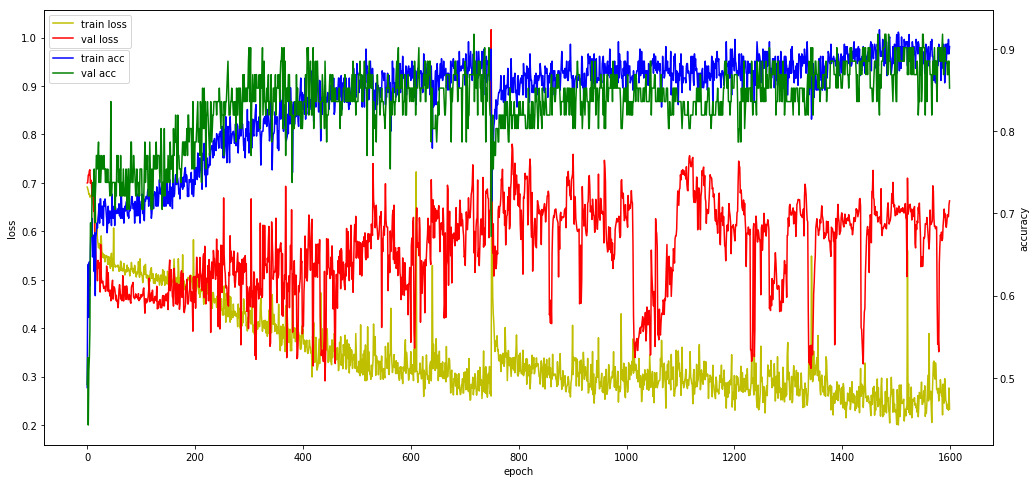

In [4]:
fig, loss_ax = plt.subplots(figsize=(17, 8))
acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
loss_ax.legend(loc='upper left', bbox_to_anchor=(0, 1))

acc_ax.plot(hist.history['acc'], 'b', label='train acc')
acc_ax.plot(hist.history['val_acc'], 'g', label='val acc')
acc_ax.set_ylabel('accuracy')
acc_ax.legend(loc='upper left', bbox_to_anchor=(0, 0.92))

plt.show()


In [5]:
tev = pd.read_csv('dataset/test_set_7.csv',
                 names = ["t-tau","p-tau","p/t-ratio","A-beta","a-syn","14-3-3","patients"])

dataset = tev.values
X_test = dataset[:,0:6].astype(float)
Y_test = dataset[:,6]

e = LabelEncoder()
e.fit(Y_test)
Y = e.transform(Y_test)
Y_test_encoded = np_utils.to_categorical(Y)

print("\n loss: %.4f" % (model.evaluate(X_test, Y_test_encoded)[0]))
print("\n Accuracy: %.4f" % (model.evaluate(X_test, Y_test_encoded)[1]))
AUC_score2 = roc_auc_score(Y_test_encoded, model.predict(X_test))
print("Total roc auc score = {0:0.4f}".format(AUC_score2))

52/52 [==============================] - 0s 212us/step

 loss: 0.3717
52/52 [==============================] - 0s 115us/step

 Accuracy: 0.9038
Total roc auc score = 0.9292


In [10]:
#X_val, Y_val

In [6]:
# 예측값과 실제 값의 비교
Y_prediction = model.predict(X_test)
for t in range(52):
    print(Y_test_encoded[t], Y_prediction[t])

[0. 1.] [0.39095336 0.60904664]
[0. 1.] [0.44375893 0.55624104]
[0. 1.] [0.16523767 0.8347623 ]
[0. 1.] [0.8116757  0.18832427]
[0. 1.] [0.90639913 0.09360087]
[0. 1.] [0.29223263 0.7077674 ]
[0. 1.] [0.3455536  0.65444636]
[0. 1.] [0.27454698 0.725453  ]
[0. 1.] [0.47380587 0.52619416]
[0. 1.] [0.11836395 0.881636  ]
[0. 1.] [0.21555877 0.78444123]
[0. 1.] [0.98027897 0.01972105]
[1. 0.] [0.98274535 0.01725468]
[1. 0.] [9.9999940e-01 6.4444663e-07]
[1. 0.] [1.000000e+00 7.547334e-30]
[1. 0.] [1. 0.]
[1. 0.] [1. 0.]
[1. 0.] [1.000000e+00 1.146011e-31]
[1. 0.] [0.99622077 0.00377927]
[1. 0.] [1.0000000e+00 4.0924995e-13]
[1. 0.] [0.98021084 0.01978917]
[1. 0.] [1.0000000e+00 4.1265064e-22]
[1. 0.] [0.9358643  0.06413563]
[1. 0.] [1. 0.]
[1. 0.] [0.99854493 0.0014551 ]
[1. 0.] [1. 0.]
[1. 0.] [1. 0.]
[1. 0.] [1. 0.]
[1. 0.] [0.9109053  0.08909473]
[1. 0.] [1.0000000e+00 1.0271801e-15]
[1. 0.] [1. 0.]
[1. 0.] [0.7656853  0.23431462]
[1. 0.] [1. 0.]
[1. 0.] [1.0000000e+00 1.9725068e-09]
[1

In [94]:
#model.summary()